2022年1月17日 記載

初めまして、B4のTです。
JoSIMの使い方とPythonでWrapperを作成したのでこちらに記していきます。

In [130]:
netlist="""
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)


*PYSQUID=========================================================================
.subckt psquid        3  5 
L1                 3         1   1.75pH fcheck
L2                 3         4   1.75pH fcheck
B1                 1         5  jjmod area=0.5
R1                 1         5   15.88ohm
B2                 2         5  jjmod area=0.5
R2                 2         5   15.88ohm
B3                 4         2  pjjmod area=20
.ends
* ===============================================



.subckt JTL     1  5  100
L1               1  2   18pH fcheck
L2               2  3   18pH fcheck
L3               3  4   18pH fcheck
L4               4  5   18pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  4   50ohm
.ends


.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Vin                     1        0    PWL(0ps 0mV 240ps 0mV 250ps 25mV 350ps 25mV 360ps 0mV   740ps 0mV 750ps 25mV 850ps 25mV 860ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
Rin                     1        2    1500ohm
L0                      2        3    2pH fcheck
L1                      3        0    40pH fcheck
X1       psquid         3        4
L3                      4        5    4.00pH fcheck
L4                      5        6    2.00pH fcheck
R1                      100      5    50ohm
X2       psquid         6        0
.ends





*** top cell: 
X0       DCHFQ          1     2  100
X1       JTL            2     3  100
X2       JTL            3     4  100
X3       JTL            4     5  100
X4       JTL            5     6  100
X5       JTL            6     7  100
X6       JTL            7     8  100
X7       JTL            8     9  100
X8       psquid         9     0
R1                      9     10  8.32ohm
L1                      10     0  2pH fcheck
Vb                      100   0  pwl(0ps 0mV 100ps 1.5mV)


**netlis file
.tran 0.2ps 1500ps 0ps 0.2ps


.print phase B1|X1|X1

.print phase B2|X1|X1

.print devi B1|X1|X1

.print devi B2|X1|X1

.print phase B1|X1|X5

.print phase B2|X1|X5


.end
"""

# Show the netlist data
# print(netlist)

pyjosimという簡単なJoSIMのWrapperパッケージを作成しました。こちらをインポートしてください。

In [131]:
from pyjosim.pyjosim import simulation

df = simulation(netlist)

df['I(B1|X1|X1)'] = df['I(B1|X1|X1)'] * 20000
df['I(B2|X1|X1)'] = df['I(B2|X1|X1)'] * 20000
# Show dataframe
# print(df)



<AxesSubplot:xlabel='time'>

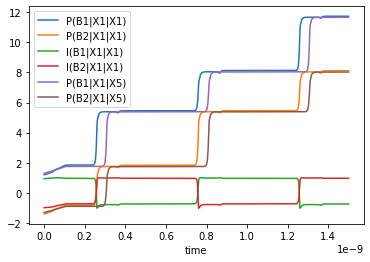

In [132]:
df.plot()